# ADVANCE STATISTICS project
## Drug Analysis using ANOVA and Principal Component Analysis on College Admissions Data.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import anova_lm 
sns.set()

In [3]:
# For Bold printing
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# PROBLEM 1:
A research laboratory was developing a new compound for the relief of severe cases of hay fever. In an experiment with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments. The data on hours of relief can be found in the following .csv file: Fever.csv

## Data Ingestion:

In [4]:
fever  = pd.read_csv("Fever.csv")

In [4]:
fever.head()

A  B  Volunteer  Relief
0  1  1          1     2.4
1  1  1          2     2.7
2  1  1          3     2.3
3  1  1          4     2.5
4  1  2          1     4.6

In [5]:
fever.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
A            36 non-null int64
B            36 non-null int64
Volunteer    36 non-null int64
Relief       36 non-null float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


## Inference
- There are no null values present in the dataset.
- There are 36 rows and 4 columns (variables).
- Out of the 4 variables, three are int64 type and one is float64 type. 'A', 'B' and 'Volunteer' are int64 type. 'Relief' is float64 type.

## Converting variables 'A', 'B' and 'Volunteer' to categories as they are not integers rather categories:

In [6]:
fever.A = pd.Categorical(fever.A)
fever.B = pd.Categorical(fever.B)
fever.Volunteer = pd.Categorical(fever.Volunteer)
fever.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
A            36 non-null category
B            36 non-null category
Volunteer    36 non-null category
Relief       36 non-null float64
dtypes: category(3), float64(1)
memory usage: 924.0 bytes


In [7]:
print('A', fever.A.unique())
print('B', fever.B.unique())
print('Volunteer', fever.Volunteer.unique())

A [1, 2, 3]
Categories (3, int64): [1, 2, 3]
B [1, 2, 3]
Categories (3, int64): [1, 2, 3]
Volunteer [1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]


In [8]:
pd.crosstab(index = [fever.A, fever.B], columns = fever['Volunteer'])

Volunteer  1  2  3  4
A B                  
1 1        1  1  1  1
  2        1  1  1  1
  3        1  1  1  1
2 1        1  1  1  1
  2        1  1  1  1
  3        1  1  1  1
3 1        1  1  1  1
  2        1  1  1  1
  3        1  1  1  1

## Inference:
- In 'A' variable, there are three unique values.
- In 'B' variable, there are three unique values.
- In 'Volunteer' variable, there are four unique values.
- A crosstabulation between 'A', 'B' and 'Volunteer' shows that three is exactly one observation in each possible combination of the three variables.

In [9]:
fever.Relief.describe()

count    36.000000
mean      7.183333
std       3.272090
min       2.300000
25%       4.675000
50%       6.000000
75%       9.325000
max      13.500000
Name: Relief, dtype: float64

## Inference
- From description of the Relief variable mean is greater than the median, thus there is a chance of positive skewness.

## Dataset Understanding:
- The Dataset contains 4 variables:
    - Two are independent variables, 'A' and 'B'. These indepedent variables or Factors contain 3 levels each.
    - 'Volunteer is the variable about which the randomization for the experiment is done.
    - 'Relief' is the Dependent variable. We observe the response of this variable for the different levels of the factors 'A' and 'B'.

## The Null and Alternate Hypothesis for variable 'A' 
- **Null hypothesis : All the population means of 'Relief' variable for factor 'A' for levels 1,2 and 3 are equal.**
    - i.e., **μA1 = μA2 = μA3**
- **Alternate hypothesis: For at least one pair of the population means of 'Relief' variable for factor 'A' for levels 1,2 and 3 is unequal.**

## The Null and Alternate Hypothesis for variable 'B' 
- **Null hypothesis: All the population means of 'Relief' variable for factor 'B' for level 1,2 and 3 are equal.**
    - i.e., **μB1 = μB2 = μB3**
- **Alternate hypothesis: For at least one pair of the population means of 'Relief' variable for factor 'B' for levels 1,2 and 3 is unequal.** 

## Assumptions:
**The following assumptions about the data are considered for performing one-way ANOVA tests:**
1. Each	sample is taken from a normally distributed population.
2. Each	sample has been drawn independently of the	other samples and randomized over.
3. Equal population variance for the dependent variables of each level samples of the independent variable.
4. Dependent variable is measured on a continuous scale.

## One-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’:

In [10]:
printmd('**The count of observations in each level of variable \'B\' :**')
fever.A.value_counts()

**The count of observations in each level of variable 'B' :**

3    12
2    12
1    12
Name: A, dtype: int64

In [11]:
printmd('**\'Relief\' means grouped by different levels of variable \'A\' :**')
fever.groupby('A').Relief.mean()

**'Relief' means grouped by different levels of variable 'A' :**

A
1    3.883333
2    7.833333
3    9.833333
Name: Relief, dtype: float64

## Inference
- The levels 1,2 and 3 of the factor 'A' are balanced.
- The means of 'Relief' variable look different, we can observe the statistically significance of this by performing one-way ANOVA on factor 'A'.

## One-Way ANOVA test for factor 'A' on 'Relief' variable:

In [12]:
formula = 'Relief ~ A'
model = ols(formula, fever).fit()
printmd('**One-way ANOVA results for independent variable \'A\' on dependent variable \'Relief\' :**')
anova_lm(model)

**One-way ANOVA results for independent variable 'A' on dependent variable 'Relief' :**

df  sum_sq     mean_sq          F        PR(>F)
A          2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN

## Inferences:
- Let us consider our Alpha value for checking the hypothesis at 0.01 (1%). This value is chosen by keeping in mind that it is a medical experiment.
- **Since the p value is only 4.578242e-07, much less than 0.01, we 'Reject' the Null Hypothesis.** There is enough statistical evidence to say that for at least one pair of the population means of 'Relief' variable for factor 'A' with levels 1,2 and 3 are unequal.
- **Thus we can say that factor 'A' has an effect on the 'Relief' variable.**

**Pointplot for observing effect of factor 'A' :**

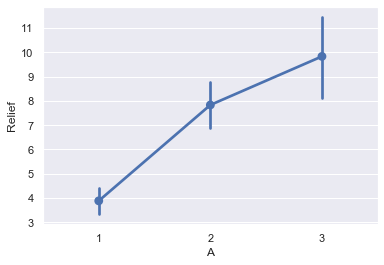

In [13]:
sns.pointplot(x = 'A', y = 'Relief', data = fever)
printmd('**Pointplot for observing effect of factor \'A\' :**')

**Boxplot for observing effect of factor 'A' :**

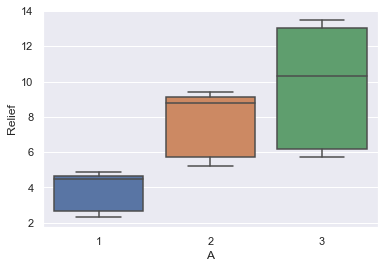

In [14]:
sns.boxplot(x = 'A', y = 'Relief', data = fever)
printmd('**Boxplot for observing effect of factor \'A\' :**')

## Inferences:
- The pointplot and Boxplot are in line with our hypothesis test results and show that there is difference in 'Relief' variable for different levels of factor 'A'.

## One-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. 

In [15]:
printmd('**The count of observations in each level of variable \'B\' :**')
fever.B.value_counts()

**The count of observations in each level of variable 'B' :**

3    12
2    12
1    12
Name: B, dtype: int64

In [16]:
printmd('**\'Relief\' means grouped by different levels of variable \'B\' :**')
fever.groupby('B').Relief.mean()

**'Relief' means grouped by different levels of variable 'B' :**

B
1    4.633333
2    7.933333
3    8.983333
Name: Relief, dtype: float64

## Inference
- The levels 1,2 and 3 of the factor 'B' are balanced.
- The means of 'Relief' variable look different, we can observe the statistically significance of this by performing one-way ANOVA on factor 'B'.

## One-Way ANOVA test for factor 'B' on 'Relief' variable:

In [17]:
formula = 'Relief ~ B'
model = ols(formula, fever).fit()
printmd('**One-way ANOVA results for independent variable \'B\' on dependent variable \'Relief\' :**')
anova_lm(model)

**One-way ANOVA results for independent variable 'B' on dependent variable 'Relief' :**

df  sum_sq    mean_sq         F   PR(>F)
B          2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN

## Inferences:
- Let us consider our Alpha value for checking the hypothesis at 0.01 (1%). This value is chosen by keeping in mind that it is a medical experiment.
- **Since the p value is only 0.00135, much less than 0.01, we 'Reject' the Null Hypothesis.** There is enough statistical evidence to say that for at least one pair of the population means of 'Relief' variable for factor 'B' with levels 1,2 and 3 are unequal.
- **Thus we can say that factor 'B' has an effect on the 'Relief' variable.**

**Pointplot for observing effect of factor 'B' :**

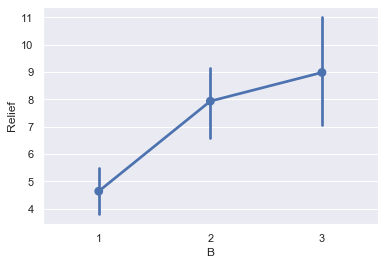

In [18]:
sns.pointplot(x = 'B', y ='Relief', data = fever)
printmd('**Pointplot for observing effect of factor \'B\' :**')

**Boxplot for observing effect of factor 'B' :**

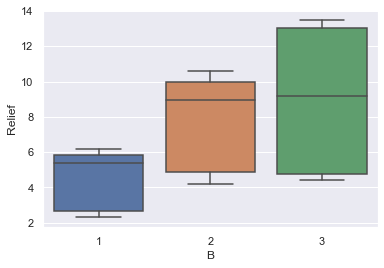

In [19]:
sns.boxplot(x = 'B', y = 'Relief', data = fever)
printmd('**Boxplot for observing effect of factor \'B\' :**')

## Inferences:
- The pointplot and Boxplot are in line with our hypothesis test results and show that there is difference in 'Relief' variable for different levels of factor 'B'.

## Analysing the effects of one variable on another with the help of an interaction plot:

In [20]:
printmd('**Count of observations for each combination of levels of factor \'A\' and \'B\'**')
pd.crosstab(index = fever.A, columns = fever.B)

**Count of observations for each combination of levels of factor 'A' and 'B'**

B  1  2  3
A         
1  4  4  4
2  4  4  4
3  4  4  4

In [21]:
printmd('**Table of means for the different combinations of levels of factor \'A\' and \'B\'**')
pd.crosstab(index = fever.A, columns = fever.B, values = fever.Relief, aggfunc = np.mean)

**Table of means for the different combinations of levels of factor 'A' and 'B'**

B      1       2       3
A                       
1  2.475   4.600   4.575
2  5.450   8.925   9.125
3  5.975  10.275  13.250

## Inference:
- The different levels of the factors 'A' and 'B' are balanced.
- In the table of means for a particular level in one factor, the value seems to change for each level of the second factor. In the interaction plot we need to observe if this change is same or different to infer on interaction between the two factors.

## Steps to analyse the interaction effect from point plot:
1. For measuring the interaction effects between two independent variables (factors) using an interaction plot, we would compare the slopes of the line joining one level to next level of a particular factor for the different levels of the other factor in the interaction plot; i.e. essentially we want to find out if the lines are intersecting or going to intersect if extended on either side. 
2. This can be measured by the difference in means of dependent variable between two consecutive levels of a particular factor at different levels of the second factor. 
    - **It is important to note here that from interaction plot we can just say if there is interaction effect present or not, we cannot comment on its statistical significance.**
3. In the present case study we have three levels: 1,2 and 3 for factor 'A' which will be denoted by the variable A1, A2 and A3 respectively and we have three levels: 1,2 and 3 for factor 'B' which will be denoted by the variable B1, B2 and B3 respectively.
4. The interactions at different levels will be denoted by **A1xB1, A1xB2, A1xB3, A2xB1, A2xB2, A2xB3, A3xB1, A3xB2, A3xB3.** These are given by the mean of the observations of dependent variable 'Relief' for each combination as shown in the table of means.
5. **We can choose either of the following steps whichever gives better interpretation.** Here we will observe both the plots.
    - (i) In our case if factor 'A' is taken on the X-axis and factor 'B' is taken as hue along with the 'Relief' variable on Y-axis, we make the following comparisons : 
        - **(A2xB1 - A1xB1), (A2xB2 - A1xB2) and (A2xB3 - A1xB3) differences are compared.**
        - **(A3xB1 - A2xB1), (A3xB2 - A2xB2) and (A3xB3 - A2xB3) differences are compared.**
    - (ii) In our case if factor 'B' is taken on the X-axis and factor 'A' is taken as hue along with the 'Relief' variable on Y-axis, we make the following comparisons : 
        - **(B2xA1 - B1xA1), (B2xA2 - B1xA2) and (B2xA3 - B1xA3) differences are compared.**
        - **(B3xA1 - B2xA1), (B3xA2 - B2xA2) and (B3xA3 - B2xA3) differences are compared.**

**Interaction plots with factor 'A' on  X-axis and factor 'B' as hue and with factor 'B' on  X-axis and factor 'A' as hue:**

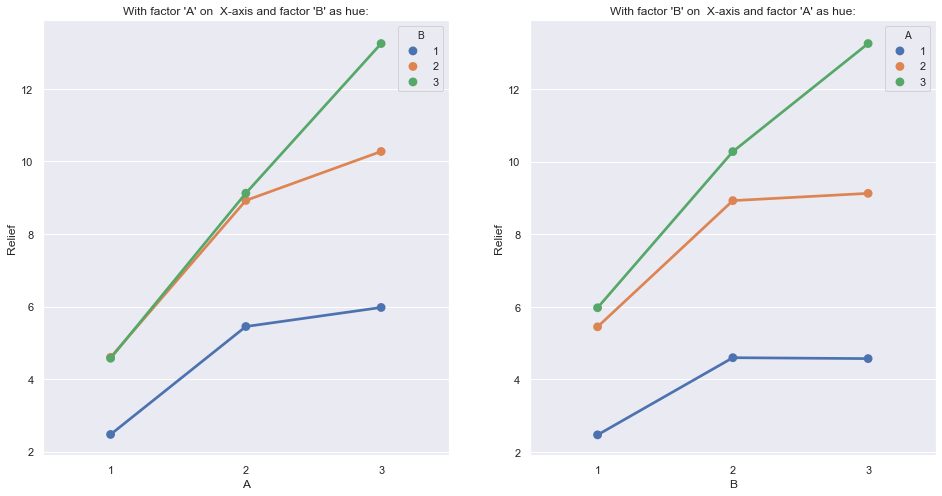

In [22]:
# Interaction plot
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sns.pointplot(x = 'A', y ='Relief', data = fever, hue = 'B',ci =None)
plt.title('With factor \'A\' on  X-axis and factor \'B\' as hue:')
plt.subplot(1,2,2)
sns.pointplot(x = 'B', y ='Relief', data = fever, hue = 'A',ci =None)
plt.title('With factor \'B\' on  X-axis and factor \'A\' as hue:')
printmd('**Interaction plots with factor \'A\' on  X-axis and factor \'B\' as hue and with factor \'B\' on  X-axis and factor \'A\' as hue:**')

# Inferences:



## Interaction effect between two treatments: 
- **Interaction effects between two treatments occur when the effect of one treatment/factor depends on the levels of another treatment/factor, i.e. when an interaction effect is present, the impact of one factor on the dependent variable depends on the levels of the second factor and vice versa.** We can be observe the interaction effect from an interaction plot, altough it is important to note here that from interaction plot we can just say if there is interaction effect present or not; to comment on the extent of statistical significance of the interaction effect we need to perform two-way ANOVA test. An interaction plot between two treatments or factors shows the variation in dependent variable mean due to interaction between the different levels of the two factors. We come to the inference if there is an interaction effect or not, by comparing the slope of the line joining the mean values of the dependent variable at two consecutive levels of one factor (the one along x-axis) at all the levels of the other factor (here levels are represented by hues). **The more the difference in slopes the higher is the interaction effect, if the slopes are same (i.e. the lines are parallel) then there is no interaction effect at those two levels due to the different levels of the other factor.** 

## Numerically analysing from interaction plots:
- For comparing the slope of the straight lines joining two points on the interaction plot, it is equivalent to calculate the difference between the Y-axis coordinates on the interaction plot as the coordinates along the x-axis are equidistant.
- With levels of factor 'A' on  X-axis and levels of factor 'B' as hue:
    - (A2xB1 - A1xB1), (A2xB2 - A1xB2) and (A2xB3 - A1xB3) differences are compared.
        - (5.450 - 2.475), (8.925 - 4.600) and (9.125 - 4.575)
        - 2.975, 4.325, 4.55.
    
    - (A3xB1 - A2xB1), (A3xB2 - A2xB2) and (A3xB3 - A2xB3) differences are compared.
        - (5.975 - 5.450), (10.275 - 8.925), (13.250 - 9.125)
        - 0.525, 1.35, 4.125
    - The above values show that the difference in two consecutive levels of factor 'A' is affected by the levels in factor 'B'.
- With factor levels of 'B' on  X-axis and levels of factor 'A' as hue:
    - (B2xA1 - B1xA1), (B2xA2 - B1xA2) and (B2xA3 - B1xA3) differences are compared.
        - (4.600 - 2.475), (8.925 - 5.450), (10.275 - 5.975)
        - 2.125, 3.475, 4.3
    - (B3xA1 - B2xA1), (B3xA2 - B2xA2) and (B3xA3 - B2xA3) differences are compared.
        - (4.575 - 4.600), (9.125 - 8.925), (13.250 - 10.275)
        - -0.025, 0.2, 2.975
    - The above values show that the difference in two consecutive levels of factor 'B' is affected by the levels in factor 'A'.
- **From the slope calculations using interaction plots, we can see that there is interaction between the two factors 'A' and 'B'. This can be statistically confirmed by doing two-way ANOVA test with interaction.**

## Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’) with the variable 'Relief':

## Assumptions :
**The following assumptions about the data are considered for performing two-way ANOVA tests:**
1. Each	combination of group samples is taken from a normally distributed population.
2. Each	combination of group samples has been drawn independently of the other samples and randomized over.
3. Equal population variance for the dependent variables of each combination of groups of the two independent variables.
4. Dependent variable is measured on a continuous scale.
5. The two independent variables should be in categorical, independent groups.

## Hypothesis Formulation:
- Hypothesis formulation for **Main (individual) effects** i.e. for independent variable 'A' and independent variable 'B' is same as mentioned in one way ANOVA individually for both.
- **Hypothesis formulation for Interaction effect:**
    - **Null hypothesis : There is no interaction between the two independent variables (factors) 'A' and 'B'.**
    - **Alternate hypothesis: There is interaction between the two independent variables (factors) 'A' and 'B'.**

In [23]:
formula = 'Relief ~ A + B + A:B'
model = ols(formula, fever).fit()
printmd('**Two-way ANOVA for independent variables \'A\' and \'B\' on dependent variable \'Relief\' :**')
anova_lm(model)

**Two-way ANOVA for independent variables 'A' and 'B' on dependent variable 'Relief' :**

df   sum_sq     mean_sq            F        PR(>F)
A          2.0  220.020  110.010000  1827.858462  1.514043e-29
B          2.0  123.660   61.830000  1027.329231  3.348751e-26
A:B        4.0   29.425    7.356250   122.226923  6.972083e-17
Residual  27.0    1.625    0.060185          NaN           NaN

## Inferences:
- Let us consider our Alpha value for checking the hypothesis at 0.01 (1%). This value is chosen by keeping in mind that it is a medical experiment.
- **Note :** While analysing two-way ANOVA, we first observe the corresponding values of the interaction term (here given in the row A:B). **If there is statistically significant interaction effect then we cannot consider the main effects i.e. p values of the independent variables separately because considering their effect separately could be misleading as there is statistically significant evidence of interaction being present between the two independent variables.**
    - In such a case we consider **simple effects or simple main effects i.e. each level at a time of one independent variable is considered for all the other levels of the second independent variable.** This can be performed by one-way ANOVAs individually for each level of one independent variable with the combination of the all the levels of the second independent variable. There are other methods as well to carry out this simple main effects analysis.
- Results of Interaction effects
    - **For interaction between factor 'A' and 'B', since p value is only 6.972e-17, much less than 0.01, we 'Reject' the Null Hypothesis.** There is enough statistical evidence to say that there is interaction between the factors 'A' and 'B'.
- **Since there is statistically significant evidence that there is interaction between the levels of the independent variable 'A' and 'B', we do not consider the p values of the main effects as they may be misleading for the reasons mentioned above.** Nonetheless reporting the p values in each case, p value for indpendent variable 'A' is 1.514e-29 and for independent variable 'B' it is 3.349e-26.


## Business implications of performing ANOVA for this particular case study:

## Simple Effects Analysis using one-way ANOVA for each level of one independent variable against all the levels of second independent variable and vice versa:

In [24]:
A_level1_df = fever[fever.A == 1][['B','Relief']]
A_level1_df

B  Relief
0   1     2.4
1   1     2.7
2   1     2.3
3   1     2.5
4   2     4.6
5   2     4.2
6   2     4.9
7   2     4.7
8   3     4.8
9   3     4.5
10  3     4.4
11  3     4.6

In [25]:
formula = 'Relief ~ B'
model = ols(formula, A_level1_df).fit()
anova_lm(model)

df     sum_sq   mean_sq          F        PR(>F)
B         2.0  11.901667  5.950833  123.12069  2.902762e-07
Residual  9.0   0.435000  0.048333        NaN           NaN

In [26]:
A_level2_df = fever[fever.A == 2][['B','Relief']]
A_level2_df

B  Relief
12  1     5.8
13  1     5.2
14  1     5.5
15  1     5.3
16  2     8.9
17  2     9.1
18  2     8.7
19  2     9.0
20  3     9.1
21  3     9.3
22  3     8.7
23  3     9.4

In [27]:
formula = 'Relief ~ B'
model = ols(formula, A_level2_df).fit()
anova_lm(model)

df     sum_sq    mean_sq           F        PR(>F)
B         2.0  34.161667  17.080833  262.782051  1.042539e-08
Residual  9.0   0.585000   0.065000         NaN           NaN

In [28]:
A_level3_df = fever[fever.A == 3][['B','Relief']]
A_level3_df

B  Relief
24  1     6.1
25  1     5.7
26  1     5.9
27  1     6.2
28  2     9.9
29  2    10.5
30  2    10.6
31  2    10.1
32  3    13.5
33  3    13.0
34  3    13.3
35  3    13.2

In [29]:
formula = 'Relief ~ B'
model = ols(formula, A_level3_df).fit()
anova_lm(model)

df      sum_sq    mean_sq           F        PR(>F)
B         2.0  107.021667  53.510833  796.028926  7.486170e-11
Residual  9.0    0.605000   0.067222         NaN           NaN

## Inference:
- **The effect of factor 'B' on level '1' of factor 'A' is statistically significant as the p value is  2.902762e-07, much less than 0.01.**
- **The effect of factor 'B' on level '2' of factor 'A' is statistically significant as the p value is  1.042539e-08, much less than 0.01.**
- **The effect of factor 'B' on level '3' of factor 'A' is statistically significant as the p value is  7.486170e-11, much less than 0.01.**

In [30]:
B_level1_df = fever[fever.B == 1][['A','Relief']]
B_level1_df

A  Relief
0   1     2.4
1   1     2.7
2   1     2.3
3   1     2.5
12  2     5.8
13  2     5.2
14  2     5.5
15  2     5.3
24  3     6.1
25  3     5.7
26  3     5.9
27  3     6.2

In [31]:
formula = 'Relief ~ A'
model = ols(formula, B_level1_df).fit()
anova_lm(model)

df     sum_sq    mean_sq           F        PR(>F)
A         2.0  28.501667  14.250833  288.219101  6.925108e-09
Residual  9.0   0.445000   0.049444         NaN           NaN

In [32]:
B_level2_df = fever[fever.B == 2][['A','Relief']]
B_level2_df

A  Relief
4   1     4.6
5   1     4.2
6   1     4.9
7   1     4.7
16  2     8.9
17  2     9.1
18  2     8.7
19  2     9.0
28  3     9.9
29  3    10.5
30  3    10.6
31  3    10.1

In [33]:
formula = 'Relief ~ A'
model = ols(formula, B_level2_df).fit()
anova_lm(model)

df     sum_sq    mean_sq           F        PR(>F)
A         2.0  70.311667  35.155833  468.744444  7.972076e-10
Residual  9.0   0.675000   0.075000         NaN           NaN

In [34]:
B_level3_df = fever[fever.B == 3][['A','Relief']]
B_level3_df

A  Relief
8   1     4.8
9   1     4.5
10  1     4.4
11  1     4.6
20  2     9.1
21  2     9.3
22  2     8.7
23  2     9.4
32  3    13.5
33  3    13.0
34  3    13.3
35  3    13.2

In [35]:
formula = 'Relief ~ A'
model = ols(formula, B_level3_df).fit()
anova_lm(model)

df      sum_sq    mean_sq            F        PR(>F)
A         2.0  150.631667  75.315833  1342.262376  7.205215e-12
Residual  9.0    0.505000   0.056111          NaN           NaN

## Inference:
- **The effect of factor 'A' on level '1' of factor 'B' is statistically significant as the p value is  6.925108e-09, much less than 0.01.**
- **The effect of factor 'A' on level '2' of factor 'B' is statistically significant as the p value is  7.972076e-10, much less than 0.01.**
- **The effect of factor 'A' on level '3' of factor 'B' is statistically significant as the p value is  7.205215e-12, much less than 0.01.**

## Inferences: 
1. From one-way ANOVA of the independent variable 'A' on dependent variable 'Relief' it is observed that if other factors are randomized over, the different levels of the active ingredient 'A' has a statistically significant effect on the relief felt by a patient suffering from hay fever. 
2. From one-way ANOVA of the independent variable 'B' on dependent variable 'Relief' it is observed that if other factors are randomized over, the different levels of the active ingredient 'B' has a statistically significant effect on the relief felt by a patient suffering from hay fever.
3. From two-way ANOVA of the independent variables 'A' and 'B' on the dependent variable 'Relief' it is observed that there is statistically significant interaction between the levels of 'A' and 'B' and thus the relief felt by a patient suffering from hay fever depends on the interaction of these levels of the factors 'A' and 'B'.
4. From the simple effects analysis performed individually for each level of factor 'A' combined with all the levels of factor 'B' on the dependent variable 'Relief' it is observed that there is statistically significant effect on the relief felt by a patient suffering from hay fever.
5. Also from the simple effects analysis performed individually for each level of factor 'B' combined with all the levels of factor 'A' on the dependent variable 'Relief' it is observed that there is statistically significant effect on the relief felt by a patient suffering from hay fever.

## Conclusion:
**Thus from the above analysis it is seen that the active ingredients 'A' and 'B' of the new compound interact with each other at different levels and this has an effect on relief felt by a patient suffering from hay fever.**

# PROBLEM 2:

The dataset Education - Post 12th Standard.csv is a dataset which contains the names of various colleges. This particular case study is based on various parameters of various institutions. You are expected to do Principal Component Analysis for this case study according to the instructions given in the following rubric. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

## Data Ingestion:

In [5]:
edu  = pd.read_csv("Education Post 12th Standard.csv")
edu.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

## Inference:
- All values are properly loaded.

In [37]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
Names          777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 109.4+ KB


In [38]:
printmd('**Total Number of Null values:**')
edu.isnull().sum().sum()

**Total Number of Null values:**

0

## Inference
- There are no Null values in the dataset
- Out of the 18 variables:
    - 1 variable is object type
    - 1 variable is float64 type
    - 16 variables are int64 type
- After studying the data dictionary provided for the dataset and the above information, it may be inferred that each of the variables are correctly represented by the corresponding data types and thus there seems to be no presence of out of context values in the variables.

In [39]:
printmd('**Number of duplicate Rows:**')
edu.duplicated().sum()

**Number of duplicate Rows:**

0

## Inference
- There are no duplicate rows present.

In [40]:
printmd('**Describing the Object type Names variable:**')
edu.Names.describe()

**Describing the Object type Names variable:**

count                    777
unique                   777
top       North Park College
freq                       1
Name: Names, dtype: object

In [41]:
printmd('**Describing the Numerical Variables:**')
edu.describe().T

**Describing the Numerical Variables:**

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

## Inference
- All the college names are unique as observed from 'Names' variable.
- Observing the difference between the mean and median, it may be inferred that some of the variables look highly skewed like 'Apps', 'Accept', 'Enroll', 'F.Undergrad' etc. This is expected as some colleges are expected to have greater number of applications, more Enrollment etc. Further analysis is done during univariate analysis.

## Understanding the Dataset:
### The Dataset includes 777 colleges and the information about these colleges is explained by the following attributes:
1. **Names:** Names of various university and colleges
2. **Apps:** Number of applications received
3. **Accept:** Number of applications accepted
4. **Enroll:** Number of new students enrolled
5. **Top10perc:** Percentage of new students from top 10% of Higher Secondary class
6. **Top25perc:** Percentage of new students from top 25% of Higher Secondary class
7. **F.Undergrad:** Number of full-time undergraduate students
8. **P.Undergrad:** Number of part-time undergraduate students
9. **Outstate:** Number of students for whom the particular college or university is Out-of-state tuition
10. **Room.Board:** Cost of Room and board
11. **Books:** Estimated book costs for a student
12. **Personal:** Estimated personal spending for a student
13. **PhD:** Percentage of faculties with Ph.D.’s
14. **Terminal:** Percentage of faculties with terminal degree
15. **S.F.Ratio:** Student/faculty ratio
16. **perc.alumni:** Percentage of alumni who donate
17. **Expend:** The Instructional expenditure per student
18. **Grad.Rate:** Graduation rate

## Dropping the 'Names' variable as it won't be necessary in our analysis:

In [42]:
edu.drop('Names', axis = 1, inplace = True)

# EDA:

## Univariate Analysis

**Histogram Plots of all the Numerical Variables:**

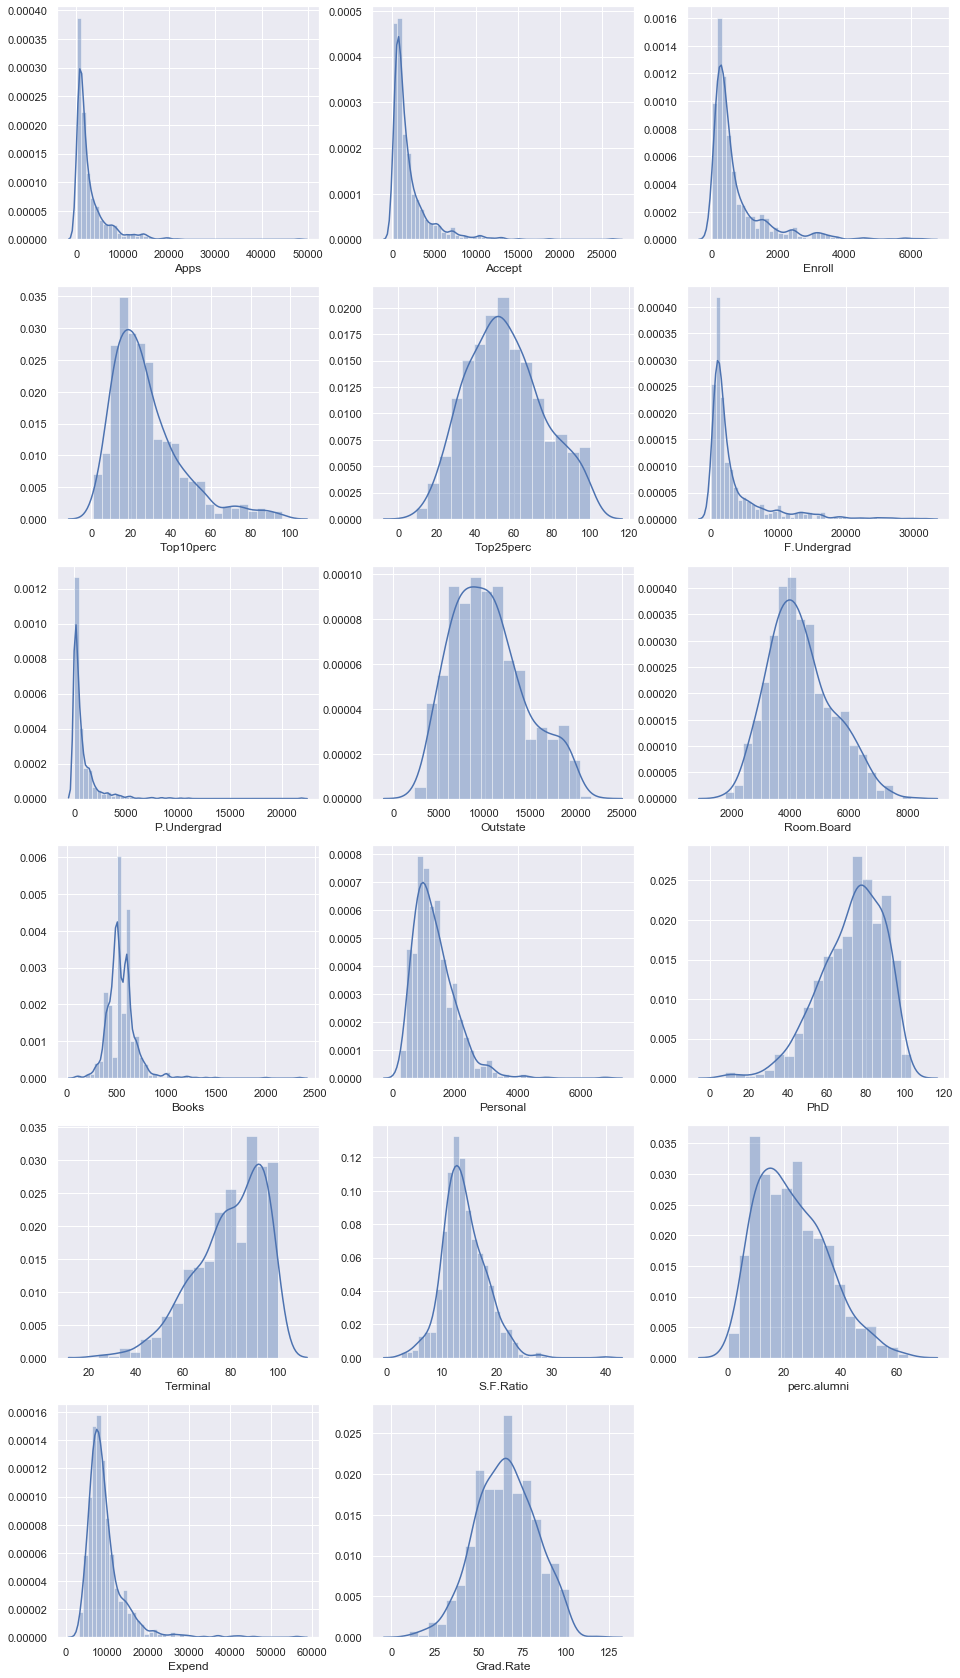

In [43]:
column_names = np.array(edu.columns.tolist())
plt.figure(figsize=(16,30))
for i in range(0,17):
    plt.subplot(6,3,i+1)
    sns.distplot(edu[column_names[i]])
printmd('**Histogram Plots of all the Numerical Variables:**')

## Inference from Histograms:
### By observing the Histograms, the following observations are made:
1. The Variables which look **nearly normally distributed** are as follows:
    - **'Grad.Rate', 'Top25perc', 'Outstate'.**
    - This means that most of the colleges are within a range of values corresponding to the individual variables and few colleges are outside this range and nearly symmetrically placed on either side of the range.
2. The Variables which look **right skewed** are as follows:
    - **'Apps', 'Accept', 'Enroll', 'F.Undergrad', 'P.Undergrad', 'Personal', 'Expend', 'Room.Board', 'S.F.Ratio', 'Top10perc', 'perc.alumni'.**
    - This right skewness may be observed because only a few colleges have higher values for the corresponding variables and most of the other colleges have low values. 
3. The Variables which look **left skewed** are as follows:
    - **'PhD', 'Terminal'.**
    - This is observed because there are only few colleges which have less percentage of faculties with PhD or Terminal degrees.
4. **'Books'** look **bimodal**. This means that the books expenses beared by students fall mainly in two ranges for most of the colleges.

In [44]:
printmd('**Skewness of the different variables in descending order of positive skewness:**')
edu.skew().sort_values(ascending = False)

**Skewness of the different variables in descending order of positive skewness:**

P.Undergrad    5.692353
Apps           3.723750
Books          3.485025
Expend         3.459322
Accept         3.417727
Enroll         2.690465
F.Undergrad    2.610458
Personal       1.742497
Top10perc      1.413217
S.F.Ratio      0.667435
perc.alumni    0.606891
Outstate       0.509278
Room.Board     0.477356
Top25perc      0.259340
Grad.Rate     -0.113777
PhD           -0.768170
Terminal      -0.816542
dtype: float64

## Inference:
1. The maximum positive skewness is observed for 'P.Undergrad' variable. 
2. A positive skewness of greater than 1 is observed for 9 variables.
3. Least skewness is observed for 'Grad.Rate'.
4. The highest negative skewness is observed for 'Terminal' variable, 'PhD' variable also has nearly same negative skewness value.

**Cumulative Distribution of all the Numerical Variables:**

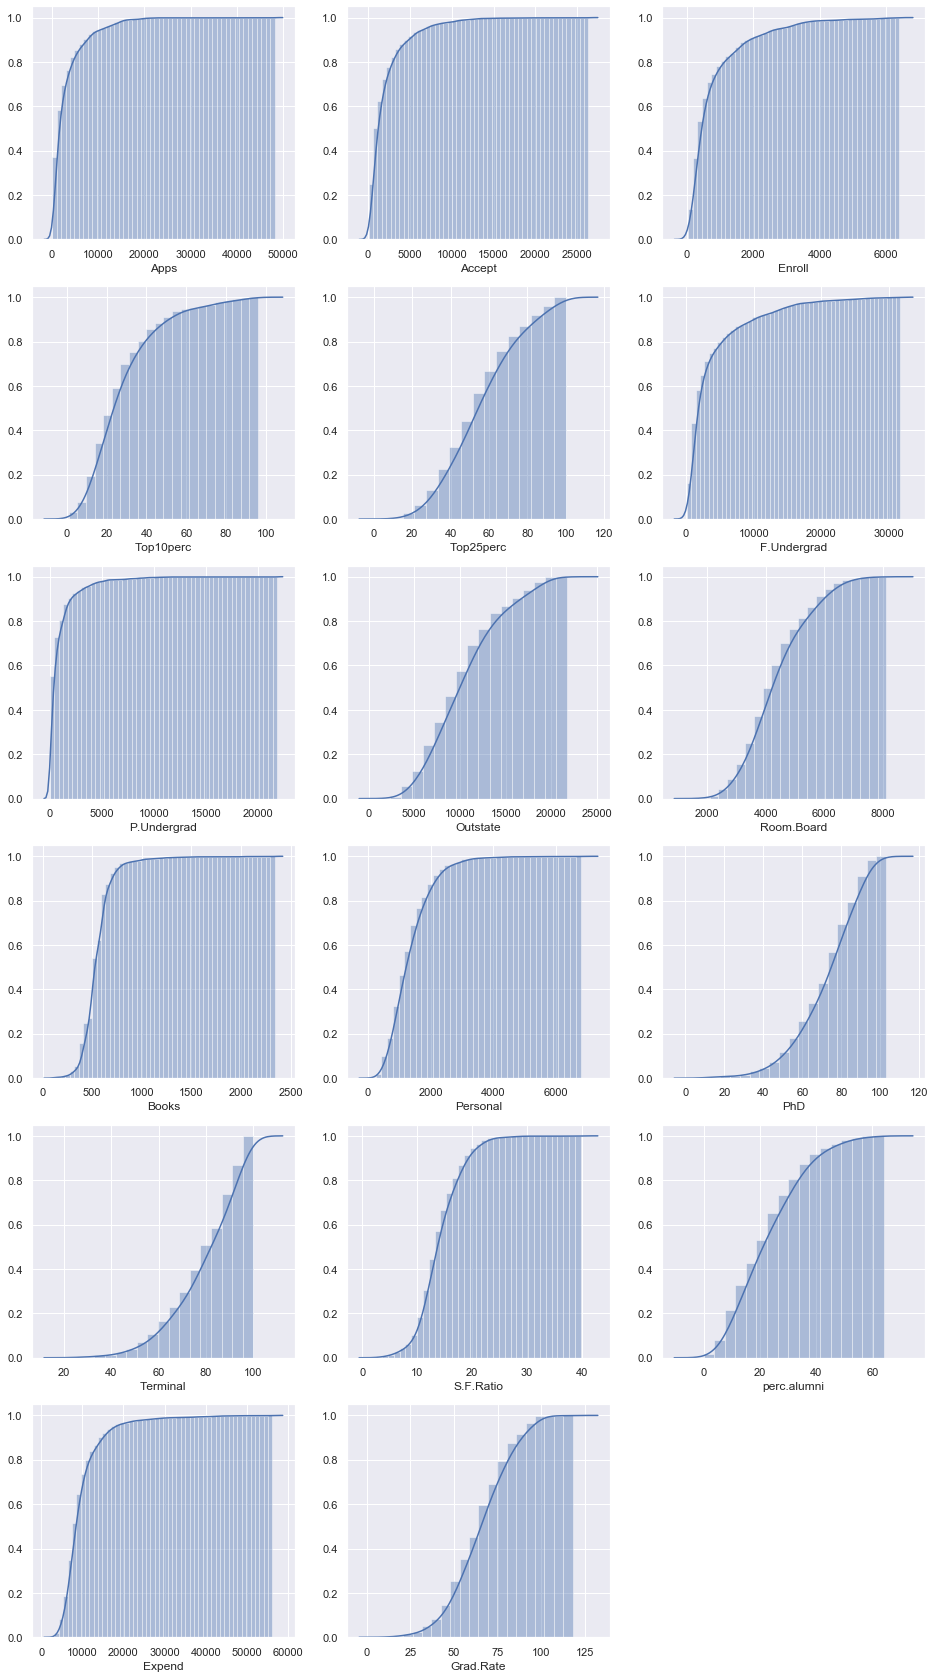

In [45]:
column_names = np.array(edu.columns.tolist())
plt.figure(figsize=(16,30))
for i in range(0,17):
    plt.subplot(6,3,i+1)
    sns.distplot(edu[column_names[i]], hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))
printmd('**Cumulative Distribution of all the Numerical Variables:**')

## Inference:
1. Very high slope is observed for variables 'Apps', 'Accept', 'Enroll', 'F.Undergrad', 'P.Undergrad', 'Books', 'Expend'. This means that most of the colleges have very low values for these variables and few colleges have higher values.
2. Moderately high slope is observed for variables 'Top10perc', 'Top25perc', 'Outstate', 'Room.Board', 'Personal', 'S.F.Ratio', 'perc.alumni', 'Grad.Rate'. This means most of colleges have low to moderate values for these variables and a few colleges have higher values.
3. Moderate slope is observed for variables 'PhD', 'Terminal'. This means nearly most of the colleges have moderate to high values for these variables and a few colleges have low values.

## Multivariate Analysis

**Pairwise scatter plot between the variables :**

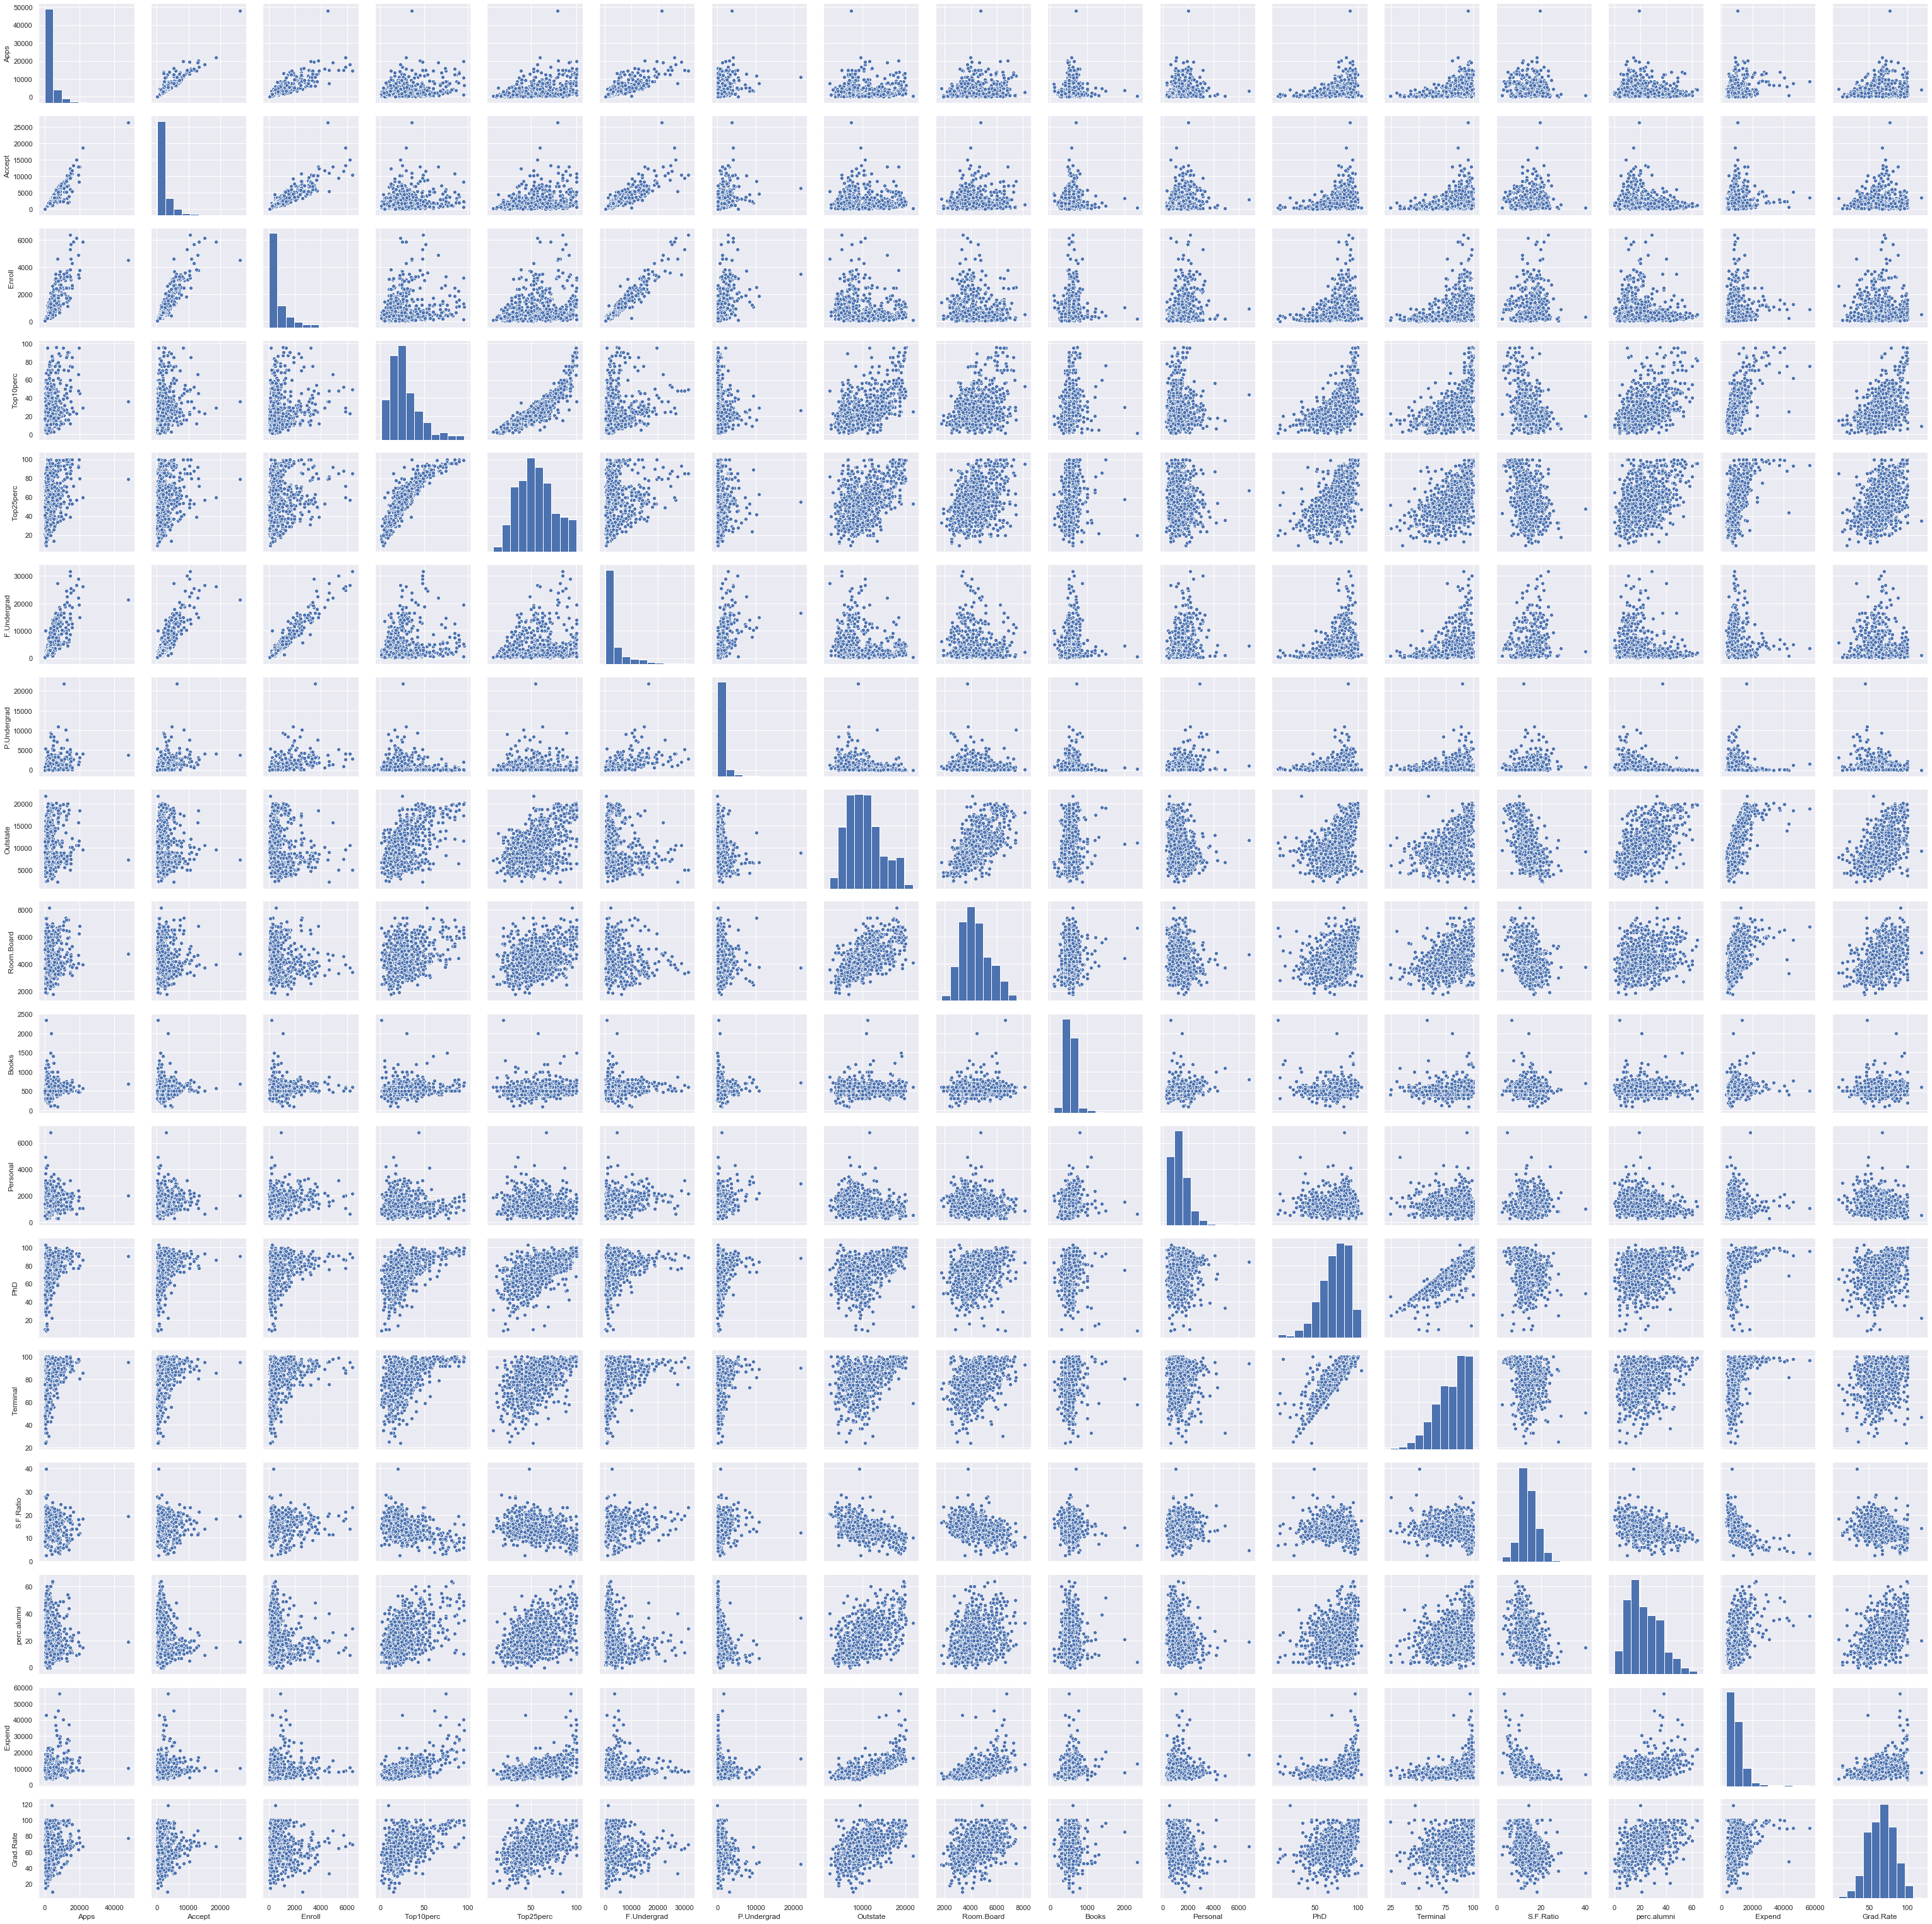

In [46]:
sns.pairplot(edu)
printmd('**Pairwise scatter plot between the variables :**')

## Inference:
- Since the pairplot output has too many plots, hence the output is not clear, so we will observe some the scatter plots after looking for interestion correlations in the correlation matrix and heatmap. 

In [47]:
printmd('**Correlation Matrix of the variables showing correlation with each other :**')
edu.corr()

**Correlation Matrix of the variables showing correlation with each other :**

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

**Heatmap showing the correlation values between the variables :**

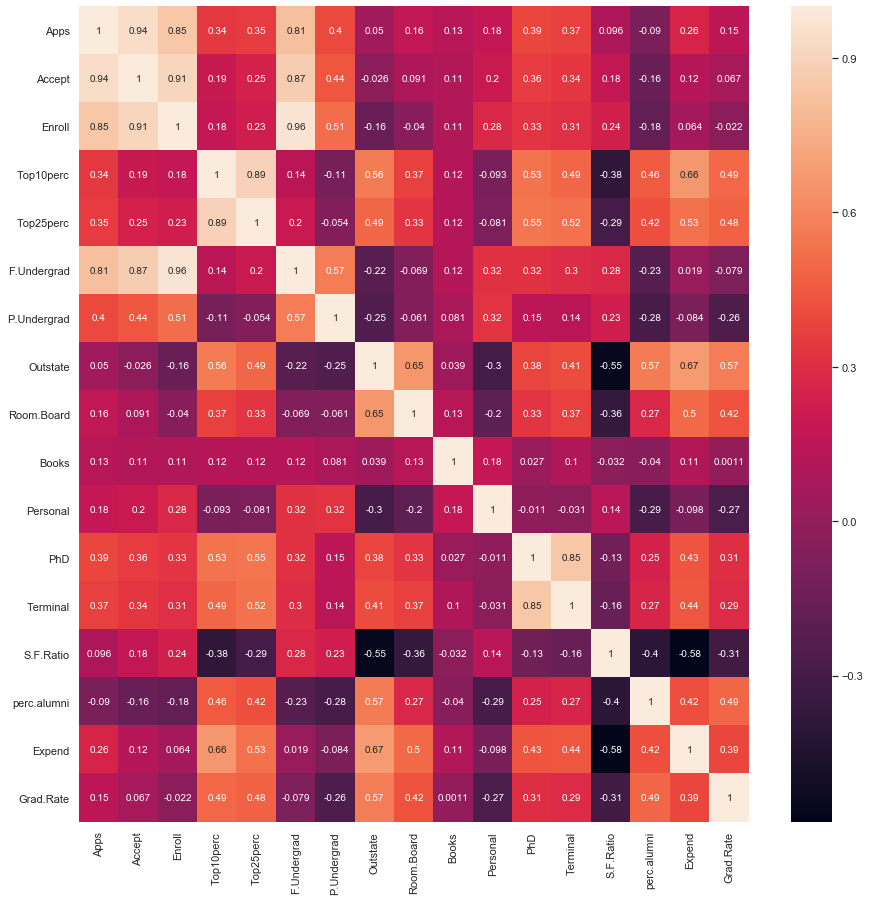

In [48]:
plt.figure(figsize = (15,15))
sns.heatmap(edu.corr(), annot =True)
printmd('**Heatmap showing the correlation values between the variables :**')

**Showing scatter plots with good correlation :**

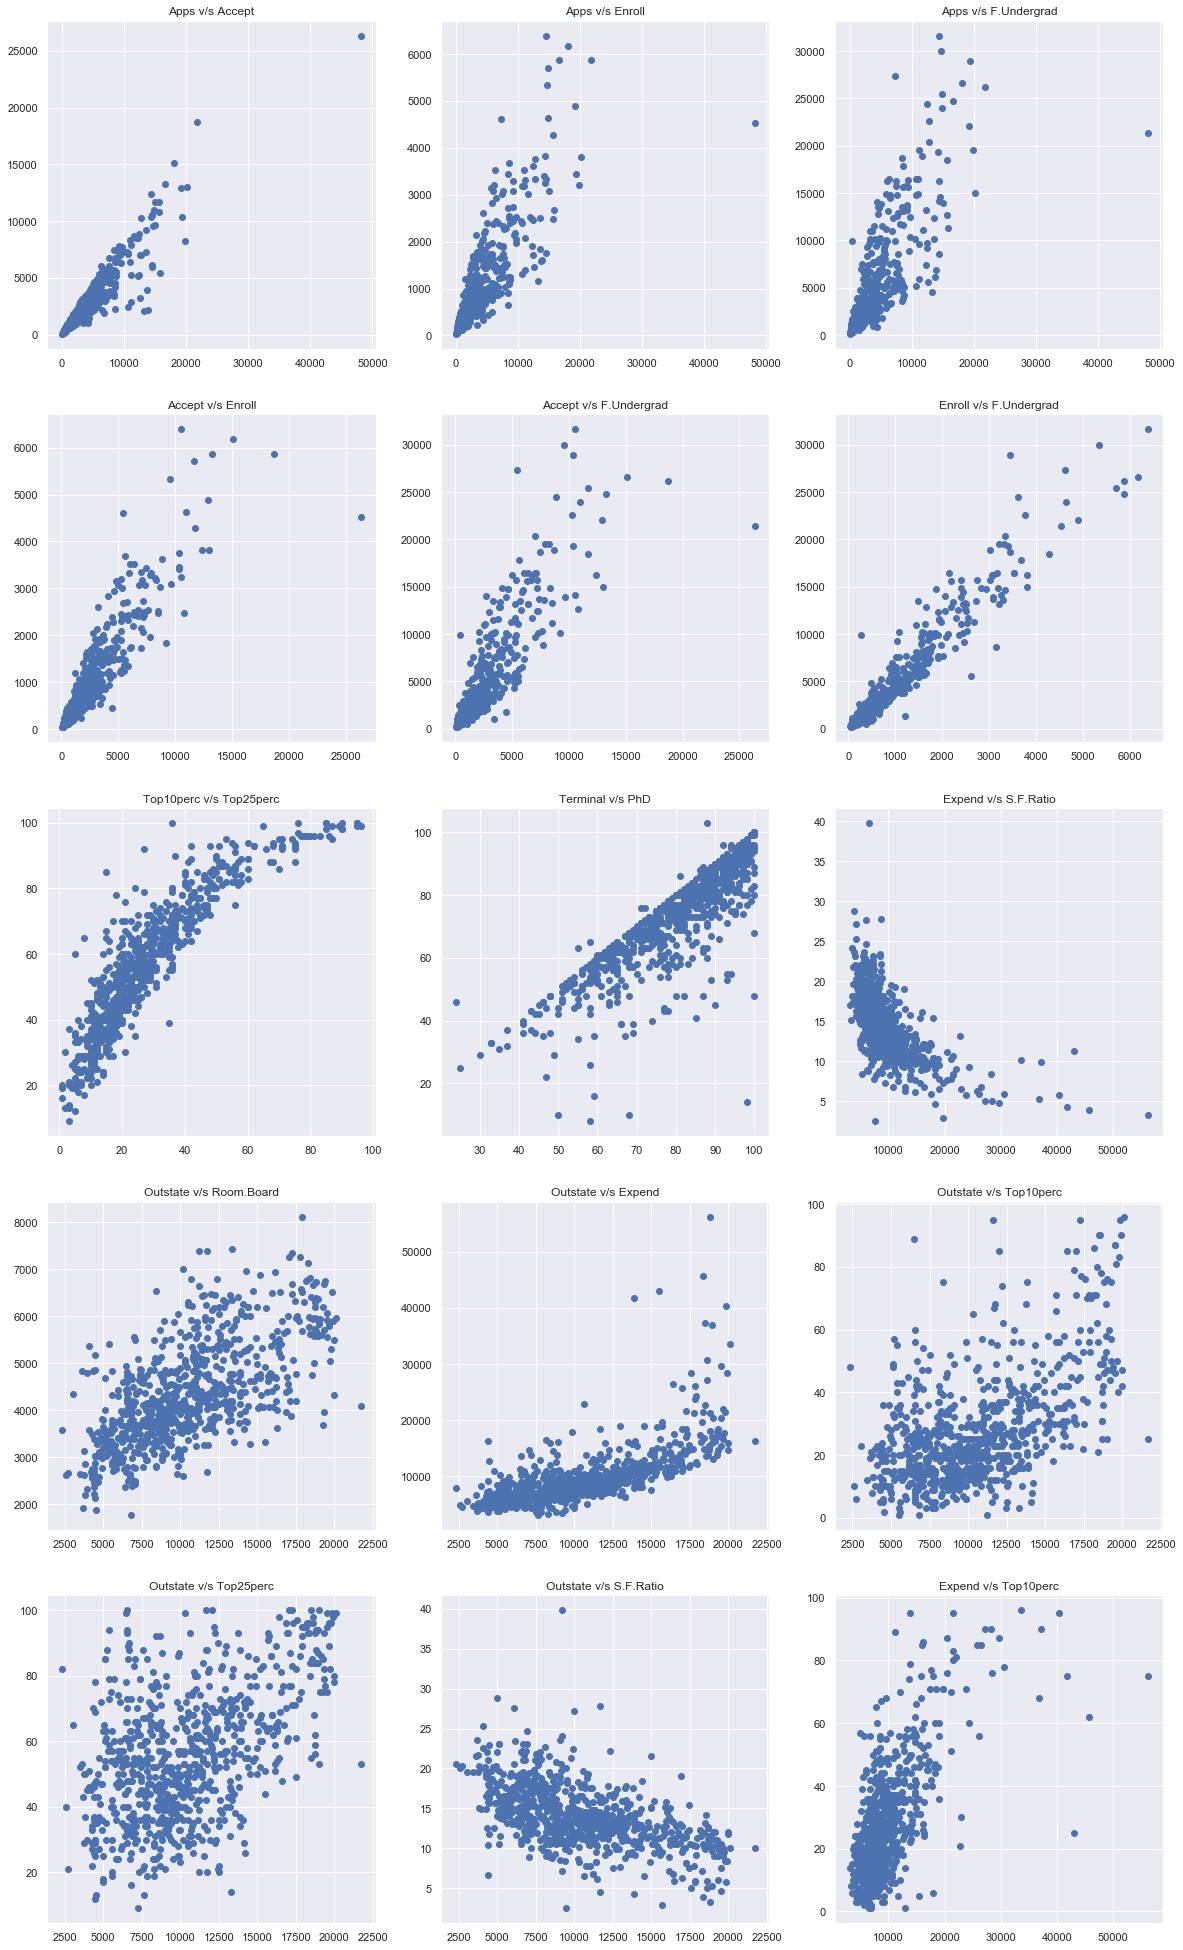

In [49]:
plt.figure(figsize=(20,35))
a = ['Apps','Apps','Apps', 'Accept', 'Accept', 'Enroll', 'Top10perc', 'Terminal',
              'Expend', 'Outstate','Outstate','Outstate','Outstate','Outstate','Expend' ]
b = ['Accept', 'Enroll', 'F.Undergrad', 'Enroll', 'F.Undergrad','F.Undergrad','Top25perc','PhD',
             'S.F.Ratio','Room.Board','Expend', 'Top10perc', 'Top25perc','S.F.Ratio','Top10perc']
count = 1
for i,j in zip(a,b):
    plt.subplot(5,3,count)
    plt.scatter(x = edu[i], y = edu[j])
    plt.title(str(i) + ' v/s ' + str (j))
    count = count + 1
printmd('**Showing scatter plots with good correlation :**')


## Inferences:
1. There is strong positive correlation between 'Apps', 'Accept', 'Enroll' and 'F.Undergrad'. The logic behind the strong positive correlation between 'Apps', 'Accept' and  'Enroll' may be as number of applications increase, this implies more number of acceptance counts and hence more number of enrollments.
2. There is strong positive correlation between 'Top10perc' and 'Top25perc'. The reason is the students present in the top 10% of higher secondary class are also present in top 25%. 
3. Also we can observe high positive correlation between 'Terminal' and 'PhD'. This may be because 'Terminal' degree holder is most probably also a PhD holder.
4. There is a medium negative correlation observed between 'Expend' and 'S.F.Ratio'; the reason may be because higher Expend ratio means student pays higher instructional expenses but higher student to faculty ratio means more students per faculty. Thus as 'S.F.Ratio' will increase, the expenses shared by the students towards 'Expend' will decrease.
5. There is medium positive correlation between 'Outstate' and 'Room.Board' and also between 'Outstate' and 'Expend'. The reason could be higher fees for public universities for out of state students.
6. There is medium correlation between 'Outstate' and 'Top10perc', 'Outstate' and 'Top25perc'. The reason could be because the top 10% and top 25% students are distributed throughout the country.

## Observing if Scaling is necessary for performing PCA in this case study:
**The dataset contains certain variables which are counts like 'Apps' having a mean value of 3001 approx and variables like 'Expend' which are expressed in currency units having  a mean value of 9660 approx whereas there are certain variables which are ratios and percentages like 'S.F.Ratio' and 'Top25perc' having much lesser magnitude of values. Since we are going to perform PCA, which essentially captures the variance in different directions, if we consider the dataset as it is, it will affect the PCA analysis. With the variables with higher magnitude and hence higher variance dominating the results. Thus to perform a fair and proper PCA analysis it is important to do scaling of the variables. Typically while performing PCA we do mean centering and then scaling by dividing by standard deviation. So we will do z-score scaling, this is done by using StandardScaler method from sklearn.preprocessing package.**

<h3 align="center">z-score = (Observation in the variable - Mean of Variable) / Standard Deviation of Variable</h3> 
 

In [50]:
printmd('**Description of the dataset to observe the high differences in mean :**')
edu.describe().T[['min','mean','max','std']].sort_values('mean',ascending =False)

**Description of the dataset to observe the high differences in mean :**

min          mean      max          std
Outstate     2340.0  10440.669241  21700.0  4023.016484
Expend       3186.0   9660.171171  56233.0  5221.768440
Room.Board   1780.0   4357.526384   8124.0  1096.696416
F.Undergrad   139.0   3699.907336  31643.0  4850.420531
Apps           81.0   3001.638353  48094.0  3870.201484
Accept         72.0   2018.804376  26330.0  2451.113971
Personal      250.0   1340.642214   6800.0   677.071454
P.Undergrad     1.0    855.298584  21836.0  1522.431887
Enroll         35.0    779.972973   6392.0   929.176190
Books          96.0    549.380952   2340.0   165.105360
Terminal       24.0     79.702703    100.0    14.722359
PhD             8.0     72.660232    103.0    16.328155
Grad.Rate      10.0     65.463320    118.0    17.177710
Top25perc       9.0     55.796654    100.0    19.804778
Top10perc       1.0     27.558559     96.0    17.640364
perc.alumni     0.0     22.743887     64.0    12.391801
S.F.Ratio       2.5     14.089704     39.8     3.958349

## Inference:
1. **We can observe from above the high difference in values between certain varibles.**

In [51]:
from sklearn.preprocessing import StandardScaler
temp_scale_array = StandardScaler().fit_transform(edu)
edu_zscale = pd.DataFrame(temp_scale_array, columns = edu.columns)
printmd('**The dataset after using StandardScaler or z-score scaling :**')
edu_zscale

**The dataset after using StandardScaler or z-score scaling :**

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0   -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1   -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2   -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3   -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4   -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   
..        ...       ...       ...        ...        ...          ...   
772 -0.208040 -0.205673 -0.255200  -1.336352  -1.505488    -0.126030   
773 -0.269575 -0.087284 -0.091509  -0.201858  -0.444454    -0.175543   
774 -0.233895 -0.042377 -0.091509   0.365389   0.262901    -0.187095   
775  1.991711  0.177256  0.578333   3.825595   2.182866     0.312977   
776 -0.003268 -0.066872 -0.095816   0.025041   0.363952    -0.146867   

     P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
0      -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028   
1       0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646   
2      -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845   
3      -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206   
4       0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672   
..           ...       ...         ...       ...       ...       ...   
772     0.771435 -0.906289   -0.417455 -0.299280 -0.207855 -0.775861   
773     0.165435  0.268462    0.549707  0.306784 -0.133960  0.020822   
774    -0.453053 -0.880670   -0.143730  0.409815 -0.827095 -0.346878   
775    -0.507606  2.337894    1.963953  0.488603  1.144424  1.430339   
776     0.572283 -1.355744   -0.727676 -0.299280 -0.133960  0.143389   

     Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   -0.115729   1.013776    -0.867574 -0.501910  -0.318252  
1   -3.378176  -0.477704    -0.544572  0.166110  -0.551262  
2   -0.931341  -0.300749     0.585935 -0.177290  -0.667767  
3    1.175657  -1.615274     1.151188  1.792851  -0.376504  
4   -0.523535  -0.553542    -1.675079  0.241803  -2.939613  
..        ...        ...          ...       ...        ...  
772 -1.339146   1.746877    -0.706073 -0.994781  -1.483301  
773 -0.319632  -0.199632     0.666685 -0.090290   1.021555  
774 -0.319632   0.078441    -0.221570 -0.256241  -0.959029  
775  1.107689  -2.095582     2.120194  5.887971   1.953595  
776 -0.319632   1.013776     0.424434 -0.987116   1.953595  

[777 rows x 17 columns]

In [52]:
printmd('**Description of the dataset after standard scaling**')
edu_zscale.describe().T[['min','mean','max','std']]

**Description of the dataset after standard scaling**

min          mean        max       std
Apps        -0.755134  6.355797e-17  11.658671  1.000644
Accept      -0.794764  6.774575e-17   9.924816  1.000644
Enroll      -0.802273 -5.249269e-17   6.043678  1.000644
Top10perc   -1.506526 -2.753232e-17   3.882319  1.000644
Top25perc   -2.364419 -1.546739e-16   2.233391  1.000644
F.Undergrad -0.734617 -1.661405e-16   5.764674  1.000644
P.Undergrad -0.561502 -3.029180e-17  13.789921  1.000644
Outstate    -2.014878  6.515595e-17   2.800531  1.000644
Room.Board  -2.351778  3.570717e-16   3.436593  1.000644
Books       -2.747779 -2.192583e-16  10.852297  1.000644
Personal    -1.611860  4.765243e-17   8.068387  1.000644
PhD         -3.962596  5.954768e-17   1.859323  1.000644
Terminal    -3.785982 -4.481615e-16   1.379560  1.000644
S.F.Ratio   -2.929799 -2.057556e-17   6.499390  1.000644
perc.alumni -1.836580 -6.022638e-17   3.331452  1.000644
Expend      -1.240641  1.213101e-16   8.924721  1.000644
Grad.Rate   -3.230876  3.886495e-16   3.060392  1.000644

## Inference:
1. It may be observed from the description that the mean is nearly 0 and standard deviation is nearly 1, which is the effect of zscore scaling.
2. The values of the variables are now comparable and hence will give a better PCA.

## Two Dimensional Analysis to observe the dominance effect of variable on PCA :

**Observing the scatter plot for 'S.F.Ratio' vs 'Expend' with and without scaling :**

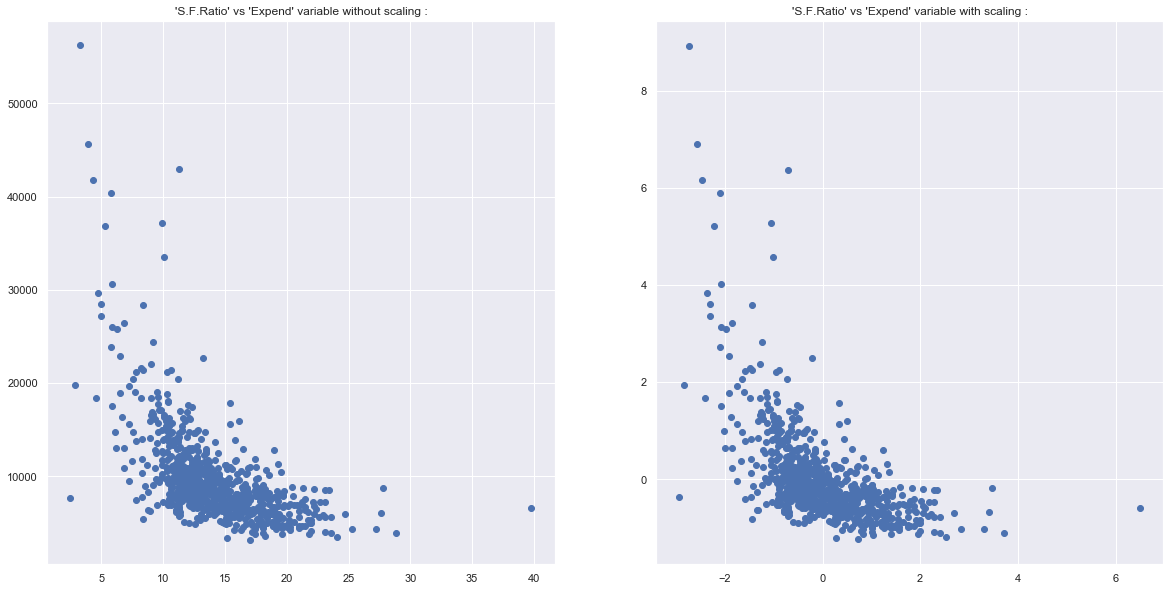

In [53]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(x = edu['S.F.Ratio'] , y = edu.Expend)
plt.title('\'S.F.Ratio\' vs \'Expend\' variable without scaling :')
plt.subplot(1,2,2)
plt.scatter(x = edu_zscale['S.F.Ratio'] , y = edu_zscale.Expend)
plt.title('\'S.F.Ratio\' vs \'Expend\' variable with scaling :')
printmd('**Observing the scatter plot for \'S.F.Ratio\' vs \'Expend\' with and without scaling :**')

## Inference:
- For understanding the larger picture of scaling on PCA, we can observe PCA in only two dimensions for example 'Expend' and 'S.F.Ratio'. If PCA is done here to reduce the two dimensions to one. In the scatter plot without scaling PCA will have much more dominance along the variance in the direction of Y-axis due to higher magnitude of 'Expend', whereas with scaling the effect of dominance will be less due to higher magnitude and more due to variation along the axes of principal components.

## Build the covariance matrix, eigenvalues and eigenvector:

## Significance of Eigenvectors:
- The eigenvectors in PCA are the directions in feature space along which the data vary the most. They are the coordinate axes of the new feature space formed after PCA. Each eigenvector direction is orthogonal to the other eigenvectors. The corresponding coefficients of a particular eigenvector are the loadings corresponding to each of the variables of the original dataset, if the eigenvectors are calculated for a covariance matrix of a standard scaled (z-scaled) data then these coefficients may be considered to be the correlations with the variables of the original dataset.

## Treating outliers and then standard scaling:
**First we will treat the outliers and then perform PCA. It is better to remove outliers before standard scaling is done as mean is affected by outliers and hence standard scaling is affected by outliers.**

In [67]:
from scipy.stats import iqr
edu_no_outlier = edu.copy()
lwhisker, uwhisker, lower_arrays, upper_arrays = outlier(edu_no_outlier)
for i,j in zip(lower_arrays[0],lower_arrays[1]):
    edu_no_outlier.iloc[i,j] = edu.iloc[:,j].quantile(0.25) - 1.5 * (iqr(edu.iloc[:,j]))
for i,j in zip(upper_arrays[0],upper_arrays[1]):
    edu_no_outlier.iloc[i,j] = edu.iloc[:,j].quantile(0.75) + 1.5 * (iqr(edu.iloc[:,j]))
    
lwhisker, uwhisker, lower_arrays , upper_arrays = outlier(edu_no_outlier)
printmd('**Removal of outliers by replacing them by lower and upper whiskers of IQR method :**')
print('Count of lower outliers after correction :', len(lower_arrays[0]))
print('Count of upper outliers after correction :', len(upper_arrays[0]))

# Now scaling
temp_scale_array = StandardScaler().fit_transform(edu_no_outlier)
edu_zscale_no_outlier = pd.DataFrame(temp_scale_array, columns = edu_no_outlier.columns)
printmd('**Output of first 5 rows of dataset after removal of Outliers and Standard scaling :**')
edu_zscale_no_outlier.head()

**Removal of outliers by replacing them by lower and upper whiskers of IQR method :**

Count of lower outliers after correction : 0
Count of upper outliers after correction : 0


**Output of first 5 rows of dataset after removal of Outliers and Standard scaling :**

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.376493 -0.337830  0.106380  -0.246780  -0.191827    -0.018769   
1 -0.159195  0.116744 -0.260441  -0.696290  -1.353911    -0.093626   
2 -0.472336 -0.426511 -0.569343  -0.310996  -0.292878    -0.703966   
3 -0.889994 -0.917871 -0.918613   2.129202   1.677612    -0.898889   
4 -0.982532 -1.051221 -1.062533  -0.696290  -0.596031    -0.995610   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.166083 -0.746480   -0.968324 -0.776567  1.438500 -0.174045 -0.123239   
1     0.797856  0.457762    1.921680  1.828605  0.289289 -2.745731 -2.785068   
2    -0.777974  0.201488   -0.555466 -1.210762 -0.260691 -1.240354 -0.952900   
3    -0.828267  0.626954    1.004218 -0.776567 -0.736792  1.205884  1.190391   
4     0.297726 -0.716623   -0.216006  2.219381  0.289289  0.202299 -0.538069   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.070602    -0.870466 -0.630916  -0.319205  
1  -0.489511    -0.545726  0.396097  -0.552693  
2  -0.304413     0.590864 -0.131845  -0.669437  
3  -1.679429     1.159159  2.287940  -0.377577  
4  -0.568839    -1.682316  0.512468  -2.916759

In [68]:
printmd('**Covariance Matrix after removing outlier and scaling :**')
edu_zscale_no_outlier.cov()

**Covariance Matrix after removing outlier and scaling :**

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.001289  0.956538  0.898039   0.321756   0.364961     0.862111   
Accept       0.956538  1.001289  0.936482   0.223586   0.274033     0.898190   
Enroll       0.898039  0.936482  1.001289   0.171977   0.230731     0.968549   
Top10perc    0.321756  0.223586  0.171977   1.001289   0.915053     0.111358   
Top25perc    0.364961  0.274033  0.230731   0.915053   1.001289     0.181429   
F.Undergrad  0.862111  0.898190  0.968549   0.111358   0.181429     1.001289   
P.Undergrad  0.520493  0.573429  0.642422  -0.180241  -0.099423     0.697027   
Outstate     0.065421 -0.005009 -0.155856   0.562884   0.490200    -0.226457   
Room.Board   0.187717  0.119740 -0.023876   0.357826   0.331413    -0.054546   
Books        0.236442  0.208974  0.202317   0.153650   0.169980     0.208147   
Personal     0.230244  0.256676  0.339785  -0.116880  -0.086922     0.360246   
PhD          0.464522  0.427891  0.382031   0.544749   0.552172     0.362030   
Terminal     0.435038  0.403929  0.354836   0.507401   0.528334     0.335486   
S.F.Ratio    0.126574  0.188749  0.274622  -0.388426  -0.297616     0.324922   
perc.alumni -0.101288 -0.165729 -0.223010   0.456384   0.417369    -0.285825   
Expend       0.243248  0.162017  0.054291   0.657886   0.573643     0.000371   
Grad.Rate    0.150998  0.079084 -0.023281   0.494307   0.479602    -0.082345   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.520493  0.065421    0.187717  0.236442  0.230244  0.464522   
Accept          0.573429 -0.005009    0.119740  0.208974  0.256676  0.427891   
Enroll          0.642422 -0.155856   -0.023876  0.202317  0.339785  0.382031   
Top10perc      -0.180241  0.562884    0.357826  0.153650 -0.116880  0.544749   
Top25perc      -0.099423  0.490200    0.331413  0.169980 -0.086922  0.552172   
F.Undergrad     0.697027 -0.226457   -0.054546  0.208147  0.360246  0.362030   
P.Undergrad     1.001289 -0.354673   -0.067725  0.122686  0.344496  0.127827   
Outstate       -0.354673  1.001289    0.656334  0.005117 -0.326029  0.391825   
Room.Board     -0.067725  0.656334    1.001289  0.109065 -0.219837  0.341909   
Books           0.122686  0.005117    0.109065  1.001289  0.240172  0.136566   
Personal        0.344496 -0.326029   -0.219837  0.240172  1.001289 -0.011699   
PhD             0.127827  0.391825    0.341909  0.136566 -0.011699  1.001289   
Terminal        0.122309  0.413110    0.379759  0.159523 -0.032012  0.864040   
S.F.Ratio       0.371085 -0.574422   -0.376915 -0.008547  0.174137 -0.129556   
perc.alumni    -0.419874  0.566465    0.272744 -0.042887 -0.306147  0.249198   
Expend         -0.202189  0.776327    0.581370  0.150177 -0.163481  0.511187   
Grad.Rate      -0.265499  0.573196    0.426339 -0.008061 -0.291269  0.310419   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.435038   0.126574    -0.101288  0.243248   0.150998  
Accept       0.403929   0.188749    -0.165729  0.162017   0.079084  
Enroll       0.354836   0.274622    -0.223010  0.054291  -0.023281  
Top10perc    0.507401  -0.388426     0.456384  0.657886   0.494307  
Top25perc    0.528334  -0.297616     0.417369  0.573643   0.479602  
F.Undergrad  0.335486   0.324922    -0.285825  0.000371  -0.082345  
P.Undergrad  0.122309   0.371085    -0.419874 -0.202189  -0.265499  
Outstate     0.413110  -0.574422     0.566465  0.776327   0.573196  
Room.Board   0.379759  -0.376915     0.272744  0.581370   0.426339  
Books        0.159523  -0.008547    -0.042887  0.150177  -0.008061  
Personal    -0.032012   0.174137    -0.306147 -0.163481  -0.291269  
PhD          0.864040  -0.129556     0.249198  0.511187   0.310419  
Terminal     1.001289  -0.151188     0.266375  0.524744   0.293180  
S.F.Ratio   -0.151188   1.001289    -0.412632 -0.655220  -0.308922  
perc.alumni  0.266375  -0.412632     1.001289  0.463519   0.492041  
Expend       0.524744  -0.65522

In [69]:
eig_values, eig_vectors = np.linalg.eig(edu_zscale_no_outlier.cov())
printmd('**Eigen Values of the Covariance Matrix are as follows :**')
print(eig_values)
printmd('**Eigen vectors of the Covariance Matrix for corresponding Eigen values are as follows :**')
print(eig_vectors)


**Eigen Values of the Covariance Matrix are as follows :**

[5.6625219  4.89470815 1.12636744 1.00397659 0.87218426 0.7657541
 0.58491404 0.5445048  0.42352336 0.38101777 0.24701456 0.02239369
 0.03789395 0.14726392 0.13434483 0.09883384 0.07469003]


**Eigen vectors of the Covariance Matrix for corresponding Eigen values are as follows :**

[[-2.62171542e-01  3.14136258e-01  8.10177245e-02 -9.87761685e-02
  -2.19898081e-01  2.18800617e-03 -2.83715076e-02 -8.99498102e-02
   1.30566998e-01 -1.56464458e-01 -8.62132843e-02  1.82169814e-01
  -5.99137640e-01  8.99775288e-02  8.88697944e-02  5.49428396e-01
   5.41453698e-03]
 [-2.30562461e-01  3.44623583e-01  1.07658626e-01 -1.18140437e-01
  -1.89634940e-01 -1.65212882e-02 -1.29584896e-02 -1.37606312e-01
   1.42275847e-01 -1.49209799e-01 -4.25899061e-02 -3.91041719e-01
   6.61496927e-01  1.58861886e-01  4.37945938e-02  2.91572312e-01
   1.44582845e-02]
 [-1.89276397e-01  3.82813322e-01  8.55296892e-02 -9.30717094e-03
  -1.62314818e-01 -6.80794143e-02 -1.52403625e-02 -1.44216938e-01
   5.08712481e-02 -6.48997860e-02 -4.38408622e-02  7.16684935e-01
   2.33235272e-01 -3.53988202e-02 -6.19241658e-02 -4.17001280e-01
  -4.97908902e-02]
 [-3.38874521e-01 -9.93191661e-02 -7.88293849e-02  3.69115031e-01
  -1.57211016e-01 -8.88656824e-02 -2.57455284e-01  2.89538833e-01
  -1.22467790e-01 -

## Observing explicit form of the first PC (in terms of Eigen Vectors):

In [70]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 17)
new_dimension_variable = pca.fit_transform(edu_zscale_no_outlier)


In [71]:
pc1 = pca.components_[0]
printmd('**Eigen Vector corresponding to maximum Eigen value :**')
print(pc1)

**Eigen Vector corresponding to maximum Eigen value :**

[ 0.26217154  0.23056246  0.1892764   0.33887452  0.33469053  0.16329301
  0.02247971  0.28354729  0.24418659  0.09670828 -0.03522996  0.3264107
  0.32311598 -0.16315164  0.18661083  0.32895585  0.23882245]


### Explicit form of the first PC in terms of Eigen Vectors is as follows:
**(0.26217154 * 'Apps') +  (0.23056246 * 'Accept') +  (0.1892764 * 'Enroll') +  (0.33887452 * 'Top10perc') +  (0.33469053 * 'Top25perc') + (0.16329301 * 'F.Undergrad') +  (0.02247971 * 'P.Undergrad') + (0.28354729 * 'Outstate') + (0.24418659 * 'Room.Board') +  (0.09670828 * 'Books') + (-0.03522996 * 'Personal') + (0.3264107 * 'PhD') + (0.32311598 * 'Terminal') + (-0.16315164 * 'S.F.Ratio') + (0.18661083 * 'perc.alumni') + (0.32895585 * 'Expend') + (0.23882245 * 'Grad.Rate')**

## Observing the cumulative values of the eigenvalues and deciding the optimum number of principal components:

In [72]:
printmd('**Explained variance by each principal component shown in decreasing order**')
print(pca.explained_variance_)

**Explained variance by each principal component shown in decreasing order**

[5.6625219  4.89470815 1.12636744 1.00397659 0.87218426 0.7657541
 0.58491404 0.5445048  0.42352336 0.38101777 0.24701456 0.14726392
 0.13434483 0.09883384 0.07469003 0.03789395 0.02239369]


## Inference: 
- The above values are the eigen values of the covariance matrix which show the variance captured by each principal component in decreasing order.
- The first 4 principal components capture individually greater than a variance value of 1.

**Scree Plot :**

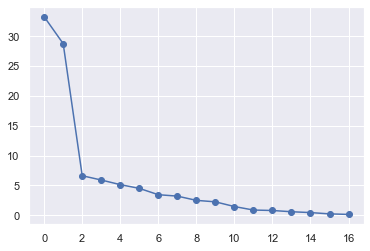

In [73]:
# Scree plot
tot = sum(pca.explained_variance_)
var_exp = [( i /tot ) * 100 for i in (pca.explained_variance_)]
plt.plot(var_exp, marker = 'o')
printmd('**Scree Plot :**')

## Inference:
- Shows the the individual explained variances by the principal components. 
- We can observe a sudden decrease in slope from the third principal component onwards. This means the maximum variances are captured by the first two principal components. This point is also called **inflection point.**

In [74]:
cum_var_exp = np.cumsum(pca.explained_variance_)
printmd('**Cumulative Variance (in absolute terms) Explained by the principal components starting from first principal component :**')
print(cum_var_exp)

**Cumulative Variance (in absolute terms) Explained by the principal components starting from first principal component :**

[ 5.6625219  10.55723004 11.68359748 12.68757408 13.55975833 14.32551243
 14.91042647 15.45493127 15.87845463 16.25947239 16.50648695 16.65375087
 16.7880957  16.88692954 16.96161957 16.99951352 17.02190722]


In [75]:
cum_var_exp = np.cumsum(var_exp)
printmd('**Cumulative Variance (in percentage terms) Explained by the principal components starting from first principal component :**')
print(cum_var_exp)

**Cumulative Variance (in percentage terms) Explained by the principal components starting from first principal component :**

[ 33.26608367  62.02142867  68.63859223  74.53673619  79.66062886
  84.15926753  87.59551019  90.79435736  93.28246491  95.52086136
  96.97201814  97.83716159  98.62640821  99.20703552  99.64582321
  99.86844192 100.        ]


## Inference:
- The first two principal components capture approximately 62% of the total variance.
- There is sudden drop in variance captured after second principal component.
- 90% of the total variance is captured by first 8 principal components.
- After the first 11 principal components there is less than 1% increase in variance captured consecutively by the remaining principal components.

**Cumulative and Individual explained variance in a single plot :**

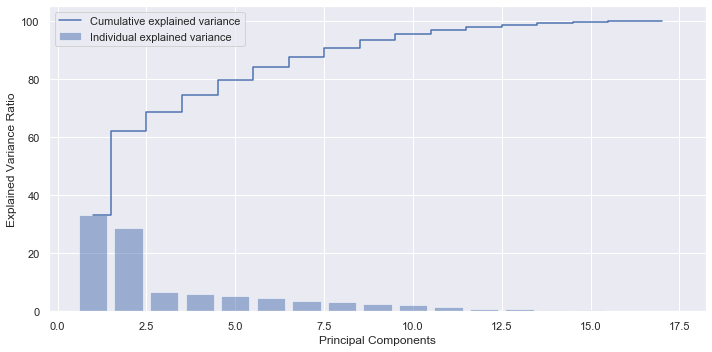

In [76]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, pca.explained_variance_.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, pca.explained_variance_.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
printmd('**Cumulative and Individual explained variance in a single plot :**')
plt.show()


## Inference:
- A combination of Individual and cumulative explained variance together. We can see that the first two principal components cover more than 60% of the explained variance and also the first two principal components individually explain much more variance as compared to the other principal components.

## Final Inferences from the above PCA:
- PCA captures maximum possible variance of the original variables with minimum number of dimensions. There are different methods employed to capture the optimum information with minimum dimensions. One of the most common method is using the cumulative values of the eigenvalues for deciding the optimum value. For better visualistion we convert the cumulative values in percentage terms first then we decide on the minimum amount of information we want to capture in our new dimensions and based on this select up to the principal components that explain the desired percentage of variance. For example in our case if we want minimum 90% of the variance explained by the new dimensions, we select the first 8 principle components which explain approximately 90.79% of the variance. 
- Some of the other methods employed for the purpose of selection of optimum number of principal components are Kraizer rule, where we consider all the principal components with eigen values greater than 1. And Scree plot, where we accept only up to the principal component previous to the inflection point (i.e. a sharp break in slope). 

## Principal Component Scores:
- There are as many principal components, as the number of variables used from the dataset for PCA. Each object in the dataset is described by all these variables. A principal component score is the score of a particular object for a particular principal component obtained by multiplying the values of the variables for the object with the corresponding coefficients/loadings of that particular principal component and adding them up.
- In our dataset there are 17 variables for PCA and hence 17 principal components. There are 777 rows and hence 777 objects which are described by these 17 variables. So there will be (17 * 777) principal component scores one each for a object for a particular principal component.
- These scores are shown below in a dataframe.

In [77]:
print('Shape of the transformed dataset with new dimension variables is : ', new_dimension_variable.shape)
printmd('**The transformed data set in array form as obtained after PCA is :**')
new_dimension_variable

Shape of the transformed dataset with new dimension variables is :  (777, 17)


**The transformed data set in array form as obtained after PCA is :**

array([[-1.60249937e+00,  9.93683013e-01,  3.00447636e-02, ...,
         3.09482851e-03, -3.06898585e-02, -1.47130758e-01],
       [-1.80467545e+00, -7.04149922e-02,  2.12212752e+00, ...,
        -3.24329699e-01, -1.63392355e-01,  1.92958540e-01],
       [-1.60828257e+00, -1.38279212e+00, -5.01512552e-01, ...,
         7.30303781e-02, -2.36336429e-02,  4.32362016e-03],
       ...,
       [-5.76882673e-01,  1.77984611e-02,  3.22160336e-01, ...,
        -1.62407776e-01, -2.70575811e-01,  3.87433636e-02],
       [ 6.57095200e+00, -1.18493014e+00,  1.32596561e+00, ...,
        -9.64378943e-02,  9.57356063e-01, -4.55356845e-01],
       [-4.77393067e-01,  1.04394672e+00, -1.42543835e+00, ...,
        -5.59570376e-03, -6.78126913e-02, -4.89303358e-02]])

In [78]:
# Converting to DataFrame
new_dimension_df = pd.DataFrame(new_dimension_variable, columns=['pc1_scores', 'pc2_scores','pc3_scores', 'pc4_scores', 'pc5_scores',
                                                                  'pc6_scores', 'pc7_scores','pc8_scores', 'pc9_scores', 'pc10_scores',
                                                                  'pc11_scores', 'pc12_scores','pc13_scores', 'pc14_scores', 'pc15_scores',
                                                                  'pc16_scores', 'pc17_scores'])


printmd('**Principal Component Scores :**')
new_dimension_df

**Principal Component Scores :**

pc1_scores  pc2_scores  pc3_scores  pc4_scores  pc5_scores  pc6_scores  \
0     -1.602499    0.993683    0.030045   -1.008422   -0.366886   -0.697476   
1     -1.804675   -0.070415    2.122128    3.138941    2.453212    0.994859   
2     -1.608283   -1.382792   -0.501513   -0.036373    0.765997   -1.026237   
3      2.803644   -3.367395    0.367768   -0.632914   -1.192601   -1.457080   
4     -2.200868   -0.099348    3.122523    0.657707   -1.828044    0.140915   
..          ...         ...         ...         ...         ...         ...   
772   -3.395392    1.995628   -0.744776    0.800067   -0.342732    0.573074   
773    0.319750   -0.314944    0.013597    0.653856    0.462527    0.741736   
774   -0.576883    0.017798    0.322160   -0.587259    0.175225    0.504043   
775    6.570952   -1.184930    1.325966    0.077707    1.368517   -0.822746   
776   -0.477393    1.043947   -1.425438   -1.300274    0.720918    1.051810   

     pc7_scores  pc8_scores  pc9_scores  pc10_scores  pc11_scores  \
0      0.710616    0.895167   -0.455352    -0.323644     0.306435   
1     -0.396083    0.259664    1.126571    -0.497736     0.172817   
2     -0.165311   -0.408818    0.273071    -0.690840     0.074447   
3     -1.199862    0.357938    0.706914    -0.085554    -0.430761   
4     -1.963228   -0.151893    0.157205    -0.025516     0.195129   
..          ...         ...         ...          ...          ...   
772   -0.171927    0.098249    1.400409    -0.110371     0.565480   
773    0.778473   -0.271679    0.475112     0.704441     0.068023   
774   -1.458352   -0.289147   -0.055564    -0.487742    -0.695723   
775    1.201326    0.005740   -0.008684    -0.412816    -0.451285   
776    1.073087    0.605417    0.655038     1.745396    -0.190284   

     pc12_scores  pc13_scores  pc14_scores  pc15_scores  pc16_scores  \
0       0.191806     0.194359     0.074920     0.003095    -0.030690   
1       0.257233    -0.164074     0.189464    -0.324330    -0.163392   
2      -0.216534     0.173713    -0.151949     0.073030    -0.023634   
3       0.822403     0.078786    -0.048176    -0.143939    -0.171666   
4       0.163324    -0.649347    -0.266673     0.270245    -0.049120   
..           ...          ...          ...          ...          ...   
772    -0.036507    -0.537543    -0.287313    -0.073026     0.101034   
773     0.128175    -0.282501     0.205270    -0.179518    -0.216853   
774     0.172667     0.017985     0.053852    -0.162408    -0.270576   
775    -0.057454    -0.248182     0.188298    -0.096438     0.957356   
776     0.256048    -0.267260    -0.509663    -0.005596    -0.067813   

     pc17_scores  
0      -0.147131  
1       0.192959  
2       0.004324  
3       0.062392  
4      -0.097715  
..           ...  
772     0.040581  
773    -0.006538  
774     0.038743  
775    -0.455357  
776    -0.048930  

[777 rows x 17 columns]

## Conclusion:
- We can select 8 out of the 17 new dimensions now to explain 90.79% of the variance and reduce the dimensionality of the dataset accordingly.

## Business Implications of using Principal Component Analysis:
1. In our case study, after performing multivariate analysis we have observed that many of the variables are correlated. Thus we don't need all these variables for analysis but we are not sure which variables to drop and which to select, hence we perform PCA, which captures the information (in the form of variance) from all these variables into new dimension variables. Now based on the requirement of information we can select the number of new dimension variables required. 
2. The new dimension variables are independent of each other, which also helps in certain algorithms. 
3. The dimensionality reduction as obtained from PCA helps in lesser computing power, i.e. faster processing for further analysis.
4. The dimensionality reduction also helps in lesser storage space.
5. The dimensionality reduction also helps in addressing the overfitting issue, which mainly occurs when there are too many variables.